<a href="https://colab.research.google.com/github/gadm21/AI/blob/master/AUV/ImageEnhancement_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/xahidbuffon/FUnIE-GAN
%cd /content/FUnIE-GAN/TF-Keras

Cloning into 'FUnIE-GAN'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 1088 (delta 14), reused 24 (delta 10), pack-reused 1054
Receiving objects: 100% (1088/1088), 126.27 MiB | 18.02 MiB/s, done.
Resolving deltas: 100% (616/616), done.


# Import

In [25]:
import os
import time
import ntpath
import numpy as np
from PIL import Image
from os.path import join, exists
from keras.models import model_from_json
from matplotlib import pyplot as plt

import cv2 
from google.colab.patches import cv2_imshow

In [11]:

## local libs
from utils.data_utils import getPaths, read_and_resize, preprocess, deprocess

# Function

In [42]:


def get_model(json_path, weight_path) :
  with open(json_path, 'r') as file:
    json_model = file.read()
  
  imageEnhancer = model_from_json(json_model)
  imageEnhancer.load_weights(weights_path)

  return imageEnhancer

def get_images():

  !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies \
    --no-check-certificate 'https://docs.google.com/uc?export=download&id=1epI9bzrB1ZRN19px_0Q5DXtxGKgbr1iM' \
    -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1epI9bzrB1ZRN19px_0Q5DXtxGKgbr1iM" -O gate1.png && rm -rf /tmp/cookies.txt

  !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies \
    --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ZPZzINhho7OAN6Ca46OiUBUGigygnyrZ' \
    -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1ZPZzINhho7OAN6Ca46OiUBUGigygnyrZ" -O gate2.png && rm -rf /tmp/cookies.txt

  !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies \
    --no-check-certificate 'https://docs.google.com/uc?export=download&id=1SRP4Vi1aGTihZ0jdS9qCGFu_2XmdSqpB' \
    -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1SRP4Vi1aGTihZ0jdS9qCGFu_2XmdSqpB" -O notgate1.png && rm -rf /tmp/cookies.txt

  !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies \
    --no-check-certificate 'https://docs.google.com/uc?export=download&id=1KpZqwU79-4w0kmh42Tqv1PRL3MyGwqu9' \
    -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1KpZqwU79-4w0kmh42Tqv1PRL3MyGwqu9" -O notgate2.png && rm -rf /tmp/cookies.txt


#show many images 
def show_images(images, labels = None):
  plt.figure(figsize=(30,20))
  columns = 4
  for i, image in enumerate(images):
      if isinstance(image, str): image = read_image(image)
      plt.subplot(len(images) / columns + 1, columns, i + 1)
      plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap='gray')
      plt.axis('off')
      if labels is not None and len(labels) > i : plt.title(str(labels[i]))

#show one image
def show_image(image):
  if isinstance(image, str) : image = read_image(image) 
  cv2_imshow(image)

def resize_image(image, newsize):
  return cv2.resize(image, newsize)

#take the image path and returns an image
def read_image(image_path, size = None):
  if size : 
    image = cv2.imread(image_path)
    return resize_image(image, size)
  return cv2.imread(image_path)


# Load model

In [14]:
weights_path = 'models/gen_p/model_15320_.h5'
model_json = 'models/gen_p/model_15320_.json'

imageEnhancer = get_model(model_json, weights_path)

# Load images

In [21]:
%%capture

%cd /content/

get_images()

gate_image_names = ['gate1', 'gate2']
notgate_image_names = ['notgate1', 'notgate2']
images = gate_image_names + notgate_image_names
images = [read_image(image+'.png') for image in images]


# Play

In [23]:




images = [resize_image(image, (256,256)) for image in images]
processed_images = [] 

for image in images : 
  
    im = preprocess(image)
    im = np.expand_dims(im, axis=0) # (1,256,256,3)
    
    gen = imageEnhancer.predict(im)
    gen_img = deprocess(gen)[0]
    
    processed_images.append(gen_img)


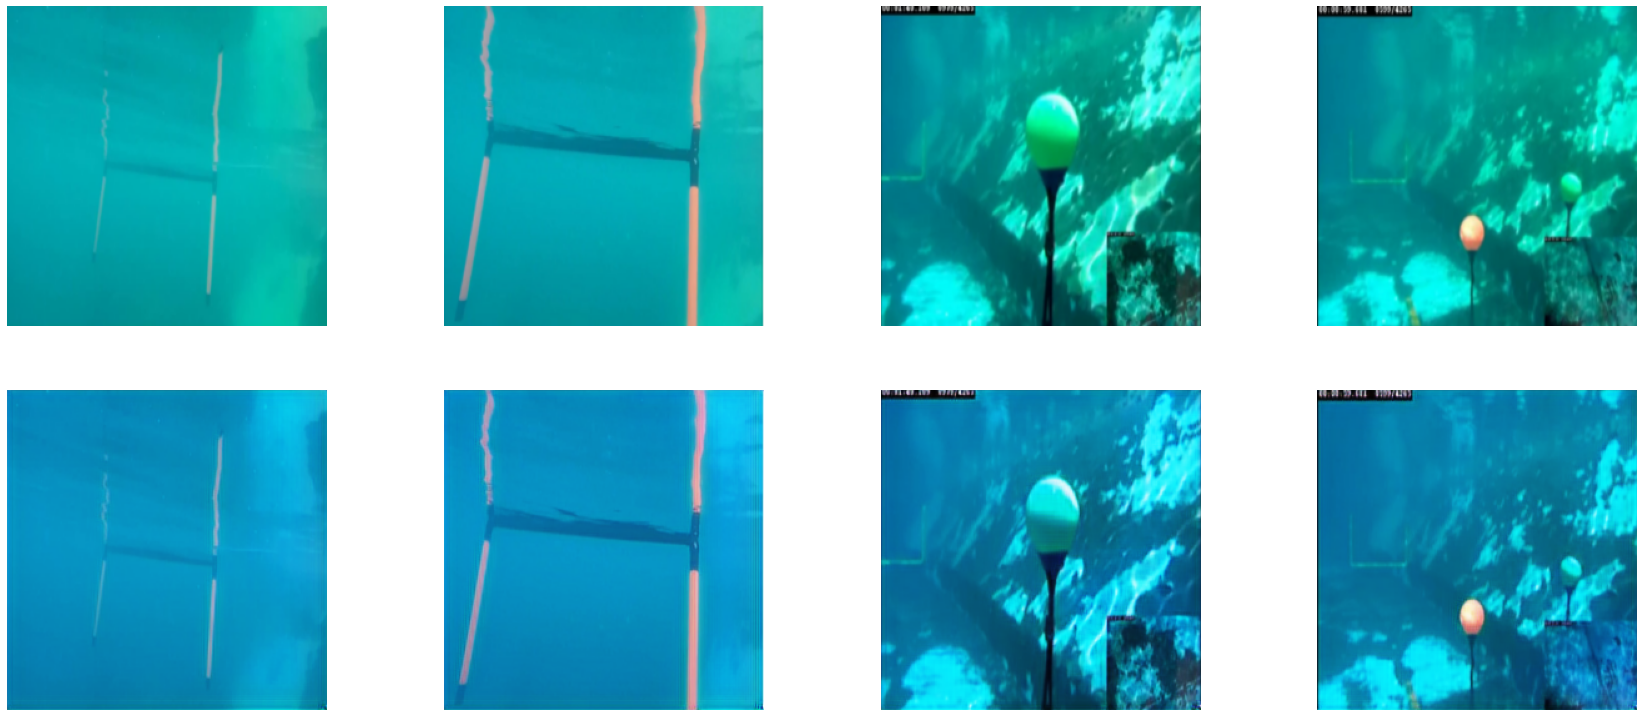

In [29]:
show_images(images + processed_images)

# Play 2

In [ ]:
%%capture 

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies \
  --no-check-certificate 'https://docs.google.com/uc?export=download&id=1-3XpVRpjWobu0_5sSLT5x5pni402d8Nv' \
  -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1-3XpVRpjWobu0_5sSLT5x5pni402d8Nv" -O clear_and_noisy.zip && rm -rf /tmp/cookies.txt

!unzip clear_and_noisy.zip

In [48]:

src_dir = '/content/clear_and_noisy'
noisy_images = [] 
enhanced_images = [] 
image_names = os.listdir(src_dir)

for image_name in image_names[:100] : 

  image_path = os.path.join(src_dir, image_name)
  image = read_image(image_path)
  original_image = resize_image(image, (256,256))
  image = preprocess(original_image) 
  image = np.expand_dims(image, axis = 0)

  enhanced_image = imageEnhancer.predict(image)
  enhanced_image = deprocess(enhanced_image)[0]

  noisy_images.append(original_image) 
  enhanced_images.append(enhanced_image)

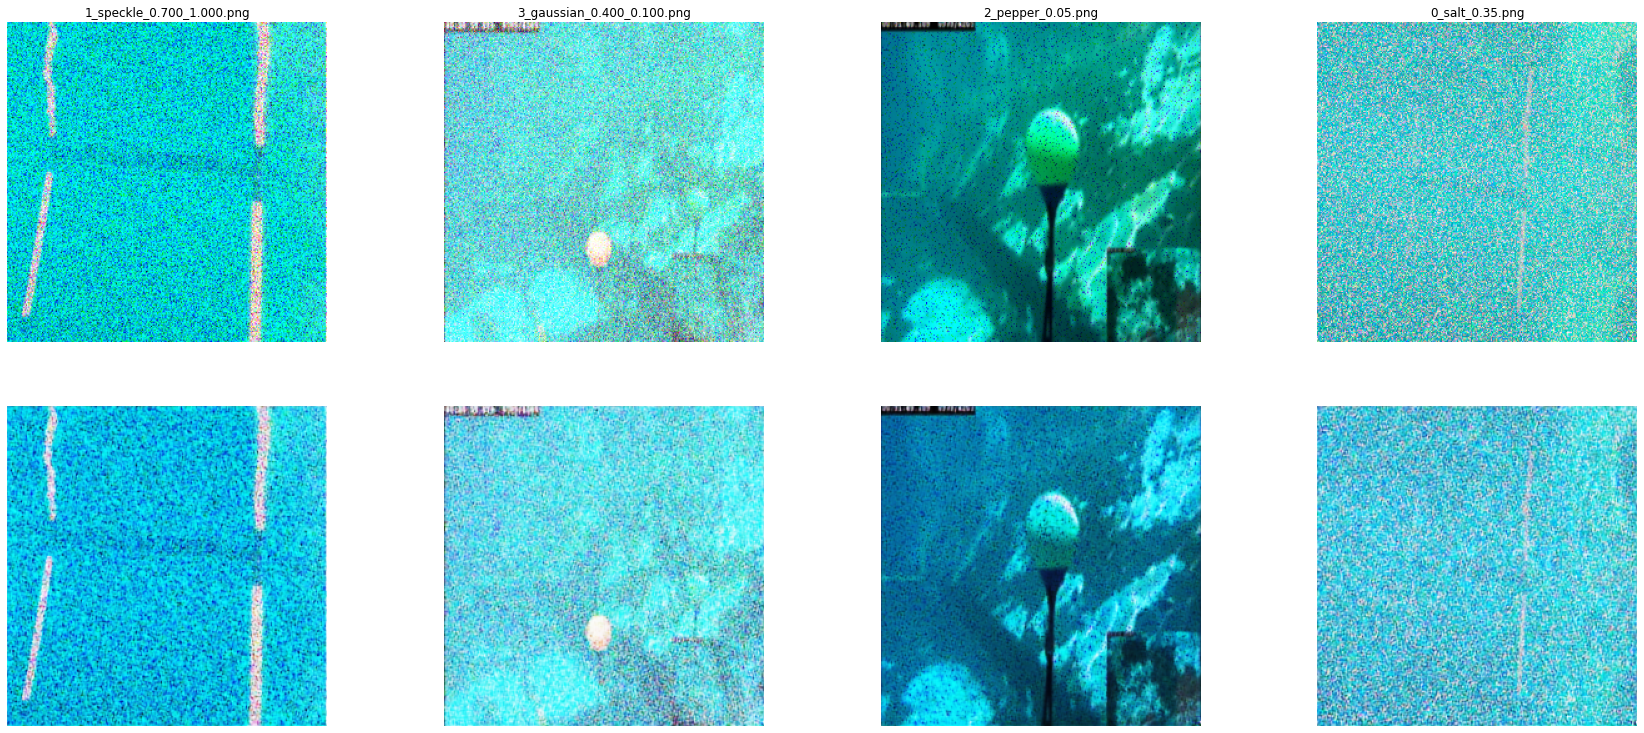

In [49]:
show_images(noisy_images[:4] + enhanced_images[:4], image_names[:4])